# Desafio Introduccion al Machine Learning Freddy Gonzalez

1.- ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no
supervisado?

el aprendizaje supervisado necesita datos etiquetados para entrenar modelos predictivos, mientras que el aprendizaje no supervisado identifica patrones ocultos sin necesidad de etiquetas.

2.- En la industria de la salud, a menudo se utiliza el machine learning para predecir la
probabilidad de enfermedades o condiciones médicas en función de diferentes
variables de entrada, como síntomas, antecedentes médicos y factores de estilo de
vida. Imagina que tienes un conjunto de datos que contiene información de
pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje
utilizarías para construir un modelo predictivo?

se utilizaria aprendizaje supervisado porque el conjunto de datos ya tiene etiquetas (enfermo/no enfermo) en consecuencia se trastaria de un problema de clasificación, el modelo aprenderia de datos previos y prodria hacer predicciones para nuevos pacientes. La regresion logistica es el algoritmo comun para este tipo de desafios ya que trata problemas binarios simples

3.- ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de
realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la
función de cada uno?

Es necesario dividir el conjunto de datos en dos subconjuntos para evaluar correctamente el desempeño del modelo y evitar problemas como el sobreajuste.

El conjunto de entrenamiento se usa para entrenar el modelo, el modelo aprende los patrones a partir de estos datos, generalmente representa entre el 70-80% del total de los datos.

el conjunto de prueba se usa para evaluar el rendimiento del modelo con datos nuevos que no ha visto antes, permite medir la capacidad de generalización del modelo, suele ser el 20-30% de los datos.

4.- ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un
enfoque estadístico y un enfoque de aprendizaje de máquinas?

Enfoque Estadístico (Inferencial)
Se centra en entender la relación entre las variables y la interpretación de los coeficientes.
Se enfoca en la significancia estadística de las variables (pruebas de hipótesis, p-valores, intervalos de confianza).
Se usa para obtener explicabilidad y formular hipótesis

Enfoque de Aprendizaje de Máquina (Predictivo)
Se enfoca en minimizar el error y mejorar la capacidad de predicción con datos nuevos.
No se preocupa tanto por la interpretabilidad de los coeficientes, sino por el rendimiento del modelo.
Puede incluir técnicas como regularización para evitar sobreajuste.
Se usa en problemas de predicción en la industria (precios, demanda, riesgo crediticio).

5.- Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de
estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).
Menciona al menos 1 aplicación en esa industria de:
a. Aprendizaje Supervisado (Clasificación)
b. Aprendizaje Supervisado (Regresión)
c. Aprendizaje No Supervisado (Clustering)
d. Aprendizaje No Supervisado (Reducción de dimensionalidad)

Aplicaciones en Retail
a. Aprendizaje Supervisado (Clasificación)

Detección de fraudes en compras con tarjeta de crédito
Se entrena un modelo para clasificar transacciones como fraudulentas o no fraudulentas según variables como monto, ubicación, frecuencia de compra, etc.

b. Aprendizaje Supervisado (Regresión)
Predicción de ventas de un producto en función del tiempo
Se usa regresión para estimar las ventas futuras de un producto considerando variables como temporada, precio, promociones.

c. Aprendizaje No Supervisado (Clustering)
Segmentación de clientes según hábitos de compra
Se usa clustering para agrupar clientes con patrones de compra similares y personalizar estrategias de marketing.

d. Aprendizaje No Supervisado (Reducción de Dimensionalidad)
Optimización de catálogo de productos
Se usa reducción de dimensionalidad para analizar grandes volúmenes de datos de productos y descubrir cuáles son los atributos más importantes que influyen en las decisiones de compra.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_excel("/content/data-housing.xlsx")
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


In [ ]:
# Para continuar con el análisis debemos convertir los valores categoricos
# Convertir valores categóricos "sí" y "no" a 1 y 0
categorical_columns = ["guestroom", "hotwaterheating", "airconditioning"]

for col in categorical_columns:
    df[col] = df[col].map({"yes": 1, "no": 0})

# Verificar cambios
df[categorical_columns].head()

,guestroom,hotwaterheating,airconditioning
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,1,0,1


# Informe de calidad de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   guestroom        545 non-null    int64
 6   hotwaterheating  545 non-null    int64
 7   airconditioning  545 non-null    int64
 8   parking          545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB
Valores nulos por columna:
price              0
area               0
bedrooms           0
bathrooms          0
stories            0
guestroom          0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64


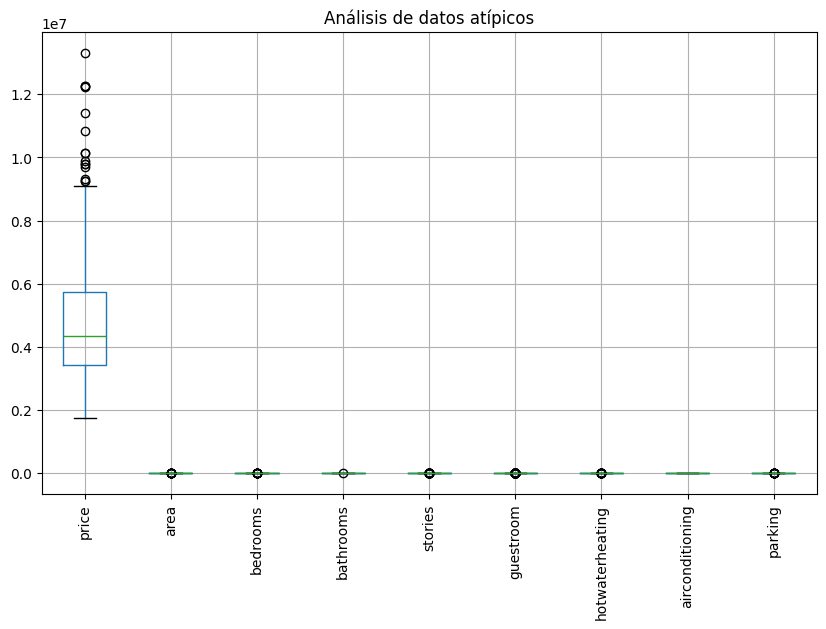

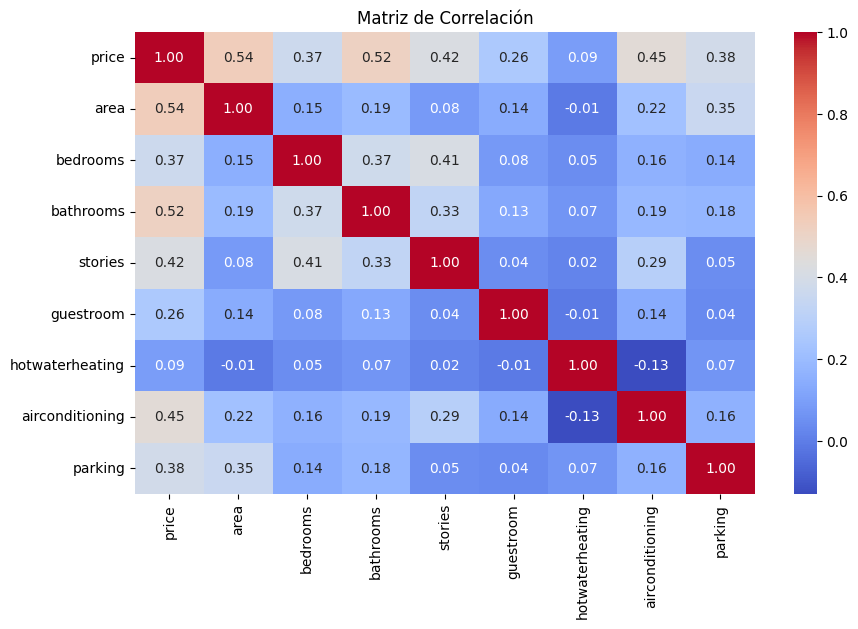

In [ ]:
# Información general sobre los datos
df.info()

# Resumen estadístico de las variables numéricas
df.describe()

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Análisis de datos atípicos con boxplots
plt.figure(figsize=(10, 6))
df.boxplot(rot=90)  # Rotar nombres de columnas si son muchas
plt.title("Análisis de datos atípicos")
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

8. Genera un modelo de regresión lineal

In [ ]:
# Seleccionar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["price"])  # Reemplaza "price" con la variable objetivo
y = df["price"]

# b. Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Crear una instancia del modelo de regresión lineal
modelo = LinearRegression()

# d. Ajustar el modelo utilizando los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

9. Evaluación del modelo

Error Cuadrado Medio (MSE) en entrenamiento: 1142290980321.33
Coeficiente de Determinación (R²) en entrenamiento: 0.63


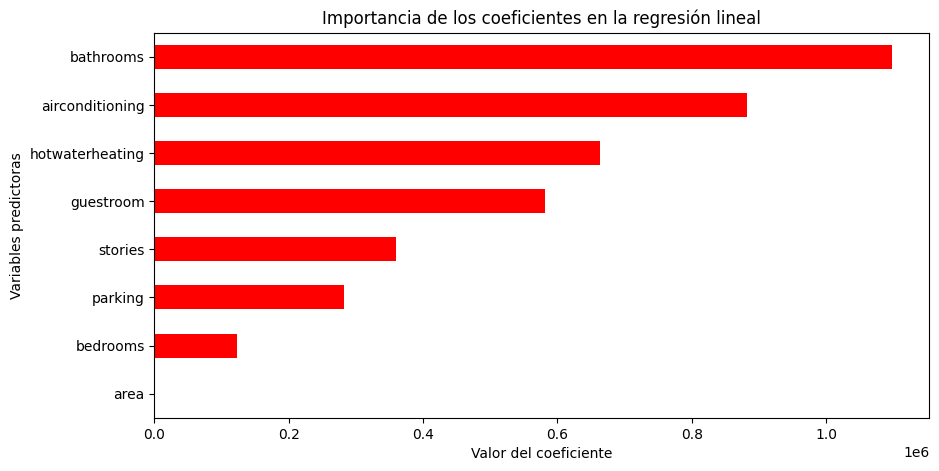

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = modelo.predict(X_train)

# a. Calcular métricas de evaluación
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Error Cuadrado Medio (MSE) en entrenamiento: {mse_train:.2f}")
print(f"Coeficiente de Determinación (R²) en entrenamiento: {r2_train:.2f}")

# b. Graficar los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

plt.figure(figsize=(10, 5))
coeficientes.sort_values().plot(kind="barh", color="red")
plt.title("Importancia de los coeficientes en la regresión lineal")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Variables predictoras")
plt.show()

b. rendimienmto del modelo

Error Cuadrado Medio (MSE) en prueba: 1961490677565.49
Coeficiente de Determinación (R²) en prueba: 0.61


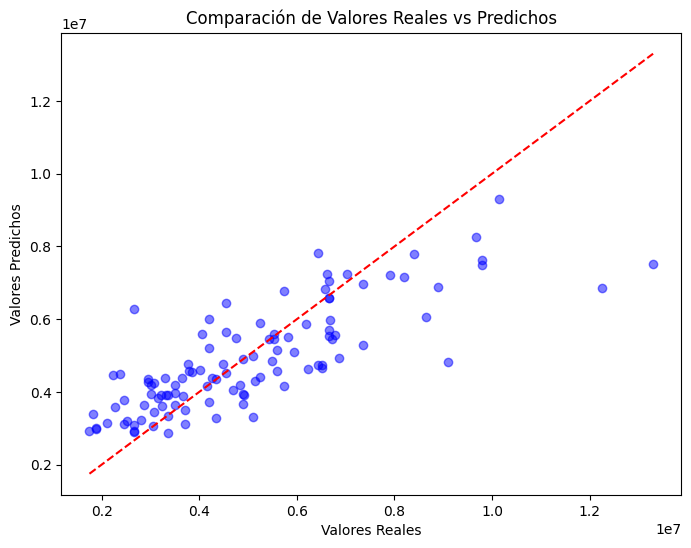

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_test_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Error Cuadrado Medio (MSE) en prueba: {mse_test:.2f}")
print(f"Coeficiente de Determinación (R²) en prueba: {r2_test:.2f}")

# Comparación visual entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red")  # Línea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs Predichos")
plt.show()

En este caso, el valor es bastante grande. Un valor grande de MSE generalmente indica que el modelo tiene errores relativamente grandes, lo que sugiere que las predicciones no son muy precisas.

R² = 0.61: Esto significa que el 61% de la variabilidad de los valores reales (y_test) es explicada por el modelo de regresión lineal. El 39% restante de la variabilidad no está explicado por el modelo y podría deberse a factores no considerados por el modelo o a error aleatorio.